# Interferometer Analysis Example
This notebook simulates an interferometer with the aim of demonstrating the required analysis steps. This work was undertaken for the Deep Space Exploration Society (see dses.science).

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

## Setup
This section includes code to initialize system parameters, as well as to simulate two astronomical sources.

In [2]:
c = 300e6

fs = 2e6 #sample rate
fc = 5e8 #5 GHz
nsamples = int(10e3) #number of samples in the acquisition

### Sources

In [3]:
class Source:
    #phi is the source's angle from vertical
    def __init__(self, phi):
        self.phi = phi
        self.freq = np.random.random()
    
    #read n samples from this source. No phase shift included
    def signal(self, n, delay):
        return np.array([np.exp(1j * self.freq * (i + delay * fc *  2 * np.pi)) for i in range(n)])

<IPython.core.display.Javascript object>


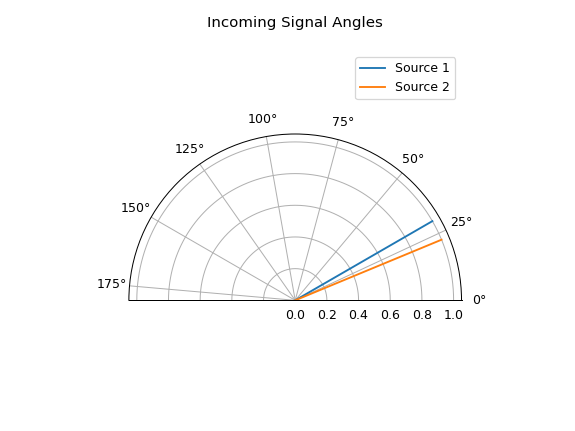

In [4]:
#Create two astronomical sources
sources = [Source(i) for i in [np.pi/6, np.pi/8]]

#Plot their positions
fig1, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.set_thetamin(0)
ax.set_thetamax(180)
plt.title("Incoming Signal Angles")
plt.plot([0,sources[0].phi], [0,1], label='Source 1')
plt.plot([0,sources[1].phi], [0,1], label='Source 2')
plt.legend()
plt.show()

### Antennas

In [5]:
#this class just keeps things clean
class Antenna:
    #creates an antenna with an offset of position
    def __init__(self, position):
        self.position = position

In [6]:
#reate two antennas
antennas = [Antenna(i) for i in [1, -1]]

## Signal reception

<IPython.core.display.Javascript object>


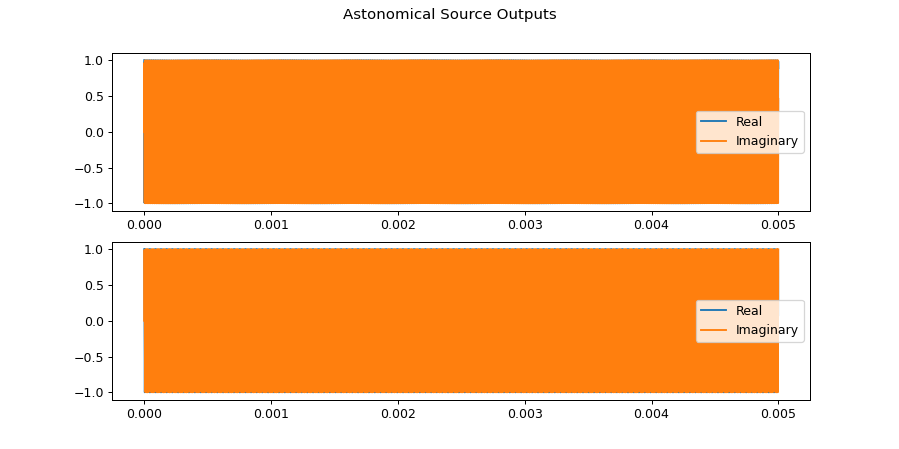

In [7]:
#calculate a time vector
t = np.arange(0, nsamples/fs, 1/fs) #1000 samples 

#Plot the signals
fig2, ax2 = plt.subplots(2, 1, figsize=(10,5))
ax2[0].plot(t, np.real(sources[0].signal(nsamples, 0)), label='Real')
ax2[0].plot(t, np.imag(sources[0].signal(nsamples, 0)), label='Imaginary')
ax2[0].legend()

ax2[1].plot(t, np.real(sources[1].signal(nsamples, 0)), label='Real')
ax2[1].plot(t, np.imag(sources[1].signal(nsamples, 0)), label='Imaginary')
ax2[1].legend()

fig2.suptitle("Astonomical Source Outputs")
plt.show()

In [8]:
#Calculate the phase shift for the second antenna
baseline = np.abs(antennas[0].position - antennas[1].position)
time_delays = [[baseline * np.cos(sources[i].phi)/c for i in range(len(sources))]
max_time_delay = baseline/c

#calculate the received signals for the two antennas
a1_rx = sources[1].signal(nsamples, 0) + sources[0].signal(nsamples, 0)
a2_rx = sources[1].signal(nsamples, time_delays[1]) + sources[0].signal(nsamples, time_delays[0])

In [9]:
type(a1_rx[0])

numpy.complex128

In [10]:
#diy autocorrelation
resultvect = np.zeros(1000, dtype='complex128')

for i in range(1000):
    phase_shift = np.exp(-1j * 2 * np.pi * (max_time_delay * (i-500) / 500) * fc)
    guessvect = a1_rx * phase_shift
    resultvect[i] = np.sum(a2_rx * guessvect)

<IPython.core.display.Javascript object>


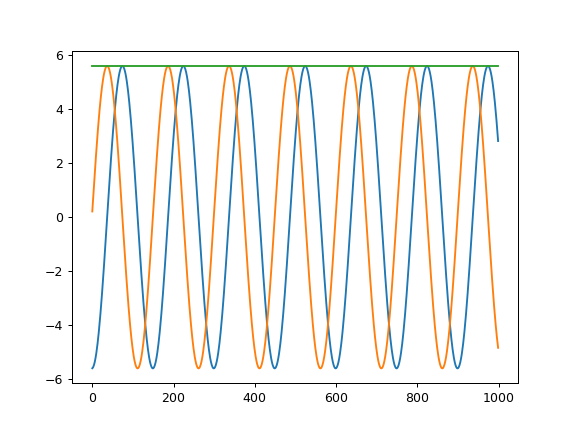

In [13]:
fig5 = plt.figure()
plt.plot(np.real(resultvect))
plt.plot(np.imag(resultvect))
plt.plot(np.abs(resultvect))